In [1]:
import pandas as pd

res = pd.read_csv('results.csv')

In [2]:
res = res[['array_size','index','method','time']]

In [3]:
res_g = res.groupby(['array_size','method']).agg({'time':['mean','std']}).reset_index()

In [4]:
res_g['array_size'] = res_g['array_size'].astype(str)

In [5]:
org = res_g.loc[res_g['method']=='original']
co = res_g.loc[res_g['method']=='change_order']
coma = res_g.loc[res_g['method']=='change_order_merge_array']
coulma = res_g.loc[res_g['method']=='change_order_unnested_loop_merge_array']
unlo = res_g.loc[res_g['method']=='unnested_loop']
ma = res_g.loc[res_g['method']=='merge_array']

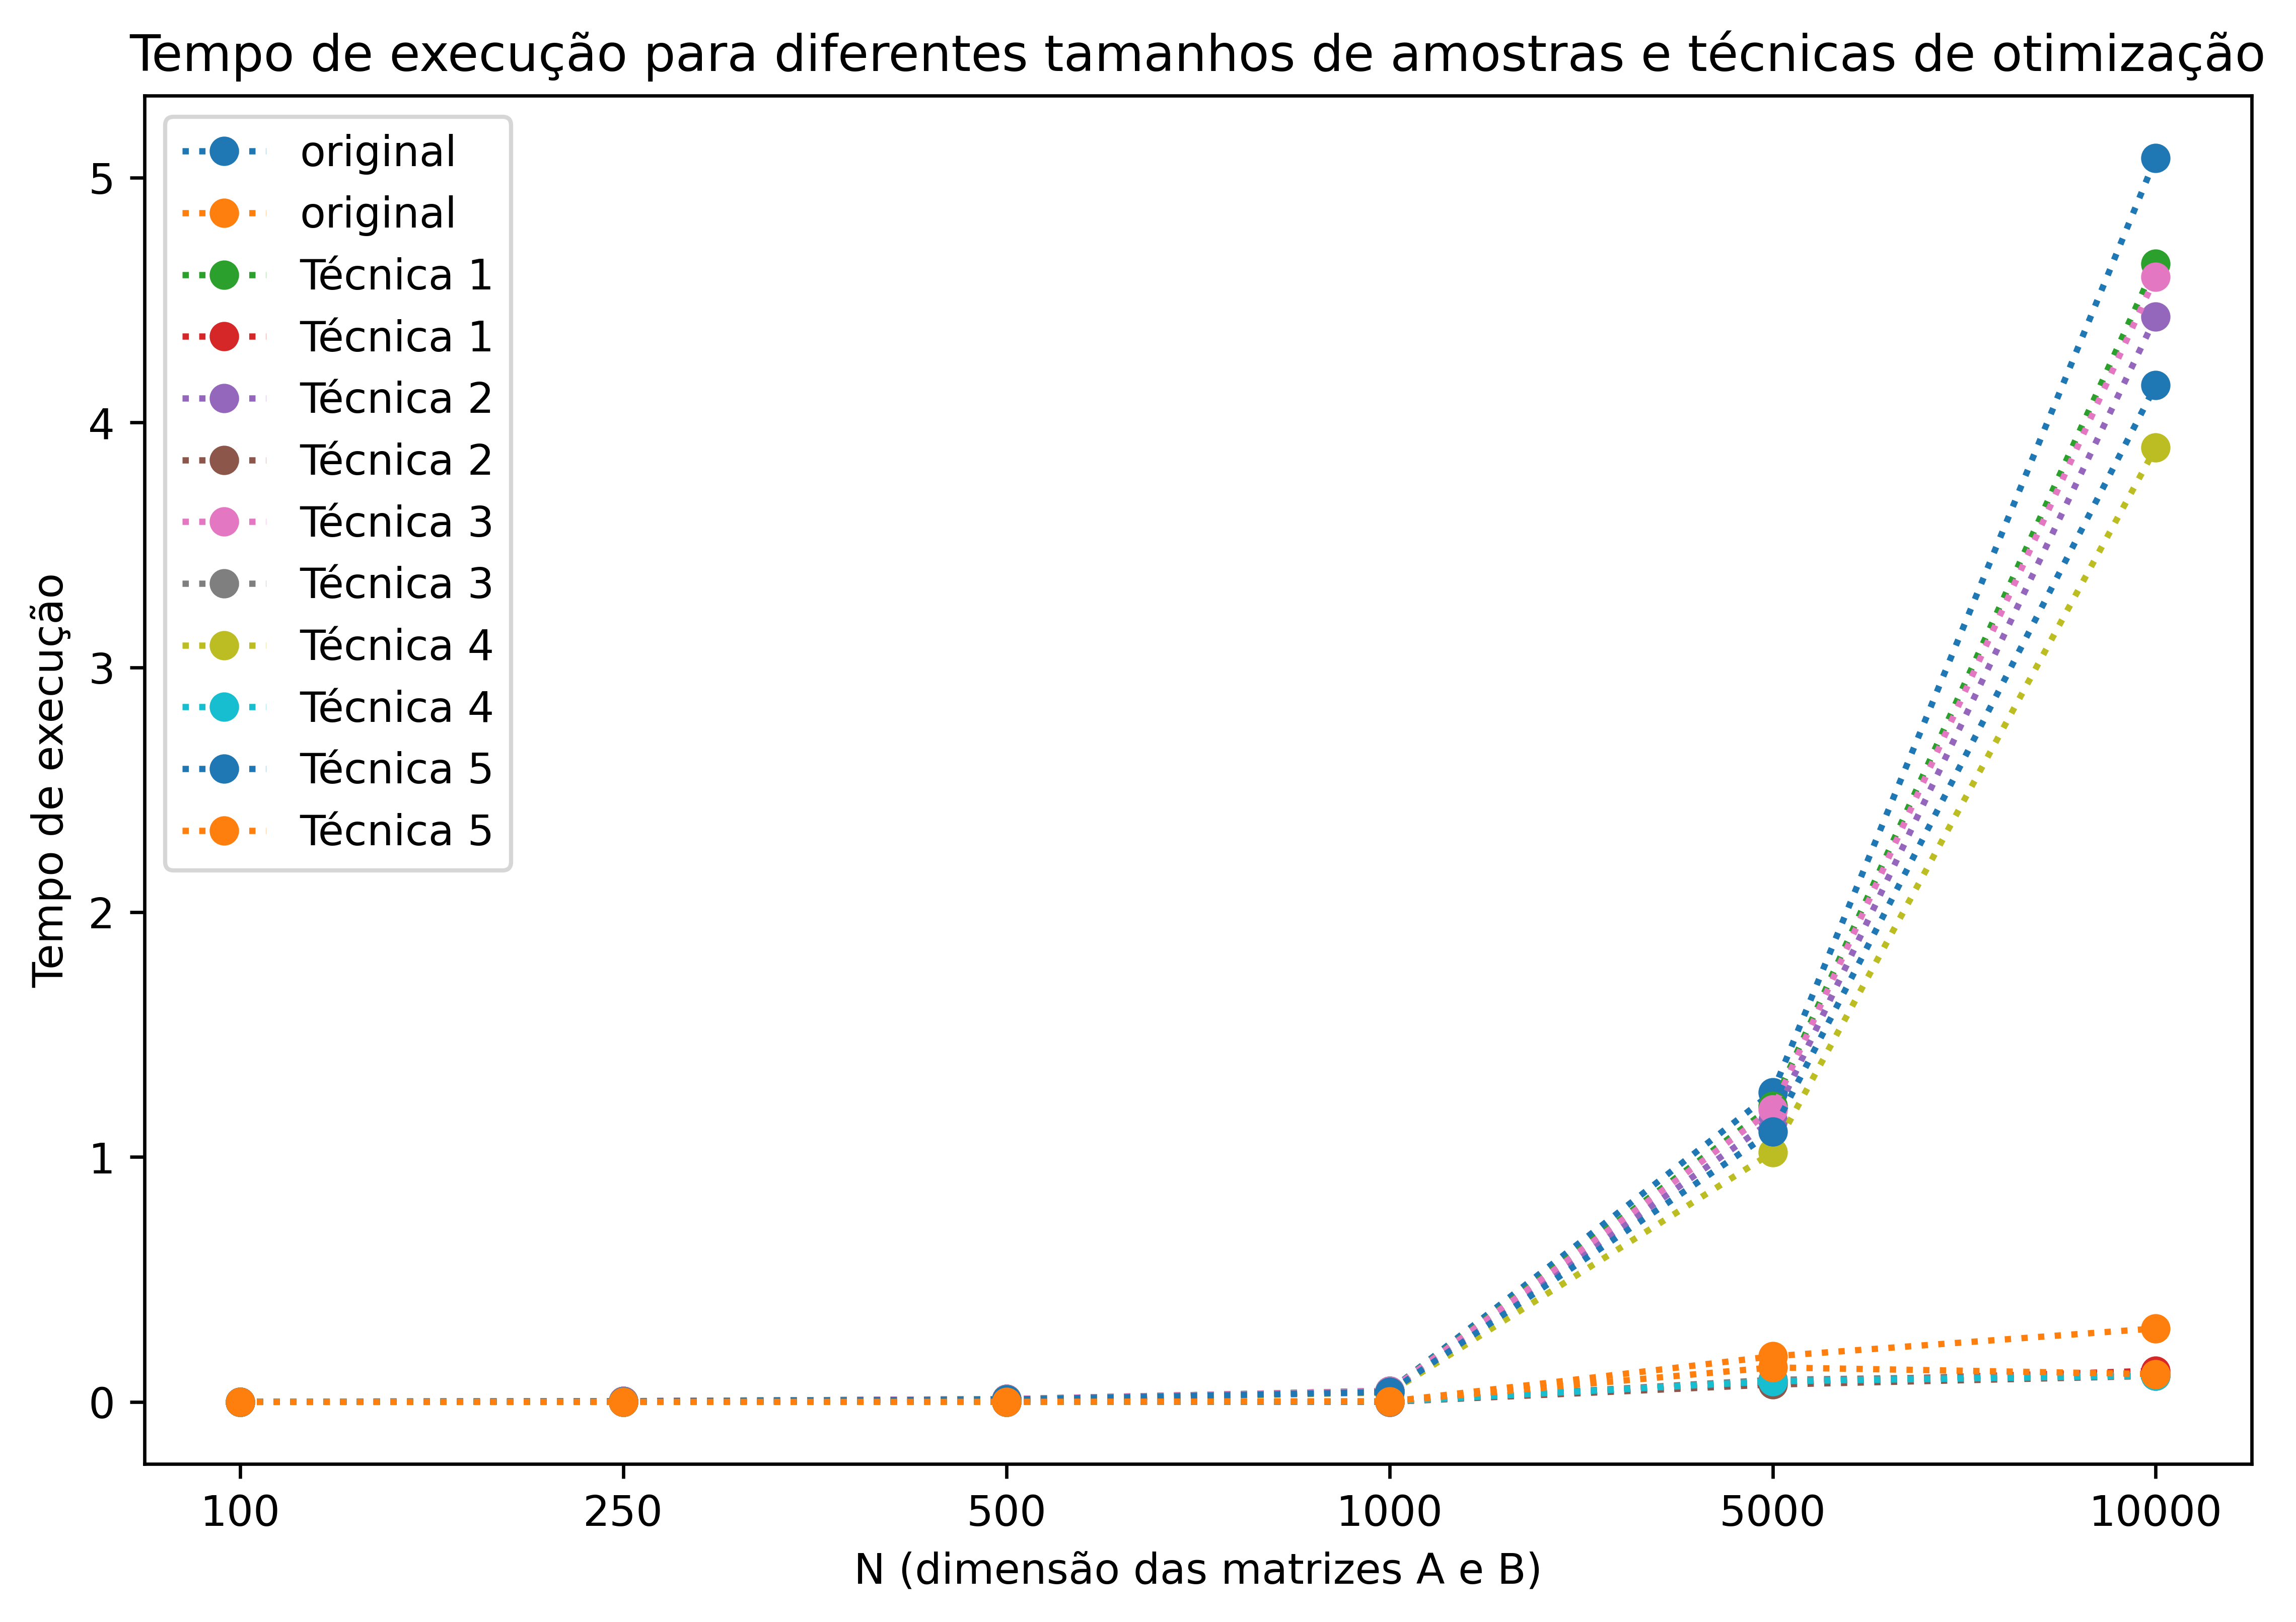

In [6]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(9, 6), dpi=600)
plt.plot(org['array_size'],org['time'],marker='o',label='original',linestyle = ':')
plt.plot(ma['array_size'],ma['time'],marker='o',label='Técnica 1',linestyle = ':')
plt.plot(co['array_size'],co['time'],marker='o',label='Técnica 2',linestyle = ':')
plt.plot(coma['array_size'],coma['time'],marker='o',label='Técnica 3',linestyle = ':')
plt.plot(unlo['array_size'],unlo['time'],marker='o',label='Técnica 4',linestyle = ':')
plt.plot(coulma['array_size'],coulma['time'],marker='o',label='Técnica 5',linestyle = ':')

plt.legend()
plt.title('Tempo de execução para diferentes tamanhos de amostras e técnicas de otimização')
plt.xlabel('N (dimensão das matrizes A e B)')
plt.ylabel('Tempo de execução')
plt.savefig('fig1.png', dpi=600)
plt.show()

In [52]:
res_m = res.loc[res['array_size']==10000]

In [53]:
res_m.loc[res_m['method']=='original','tecnica'] = 'original'
res_m.loc[res_m['method']=='merge_array','tecnica'] = 'T1'
res_m.loc[res_m['method']=='change_order','tecnica'] = 'T2'
res_m.loc[res_m['method']=='change_order_merge_array','tecnica'] = 'T3'
res_m.loc[res_m['method']=='unnested_loop','tecnica'] = 'T4'
res_m.loc[res_m['method']=='change_order_unnested_loop_merge_array','tecnica'] = 'T5'

C:\Users\frede\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\frede\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



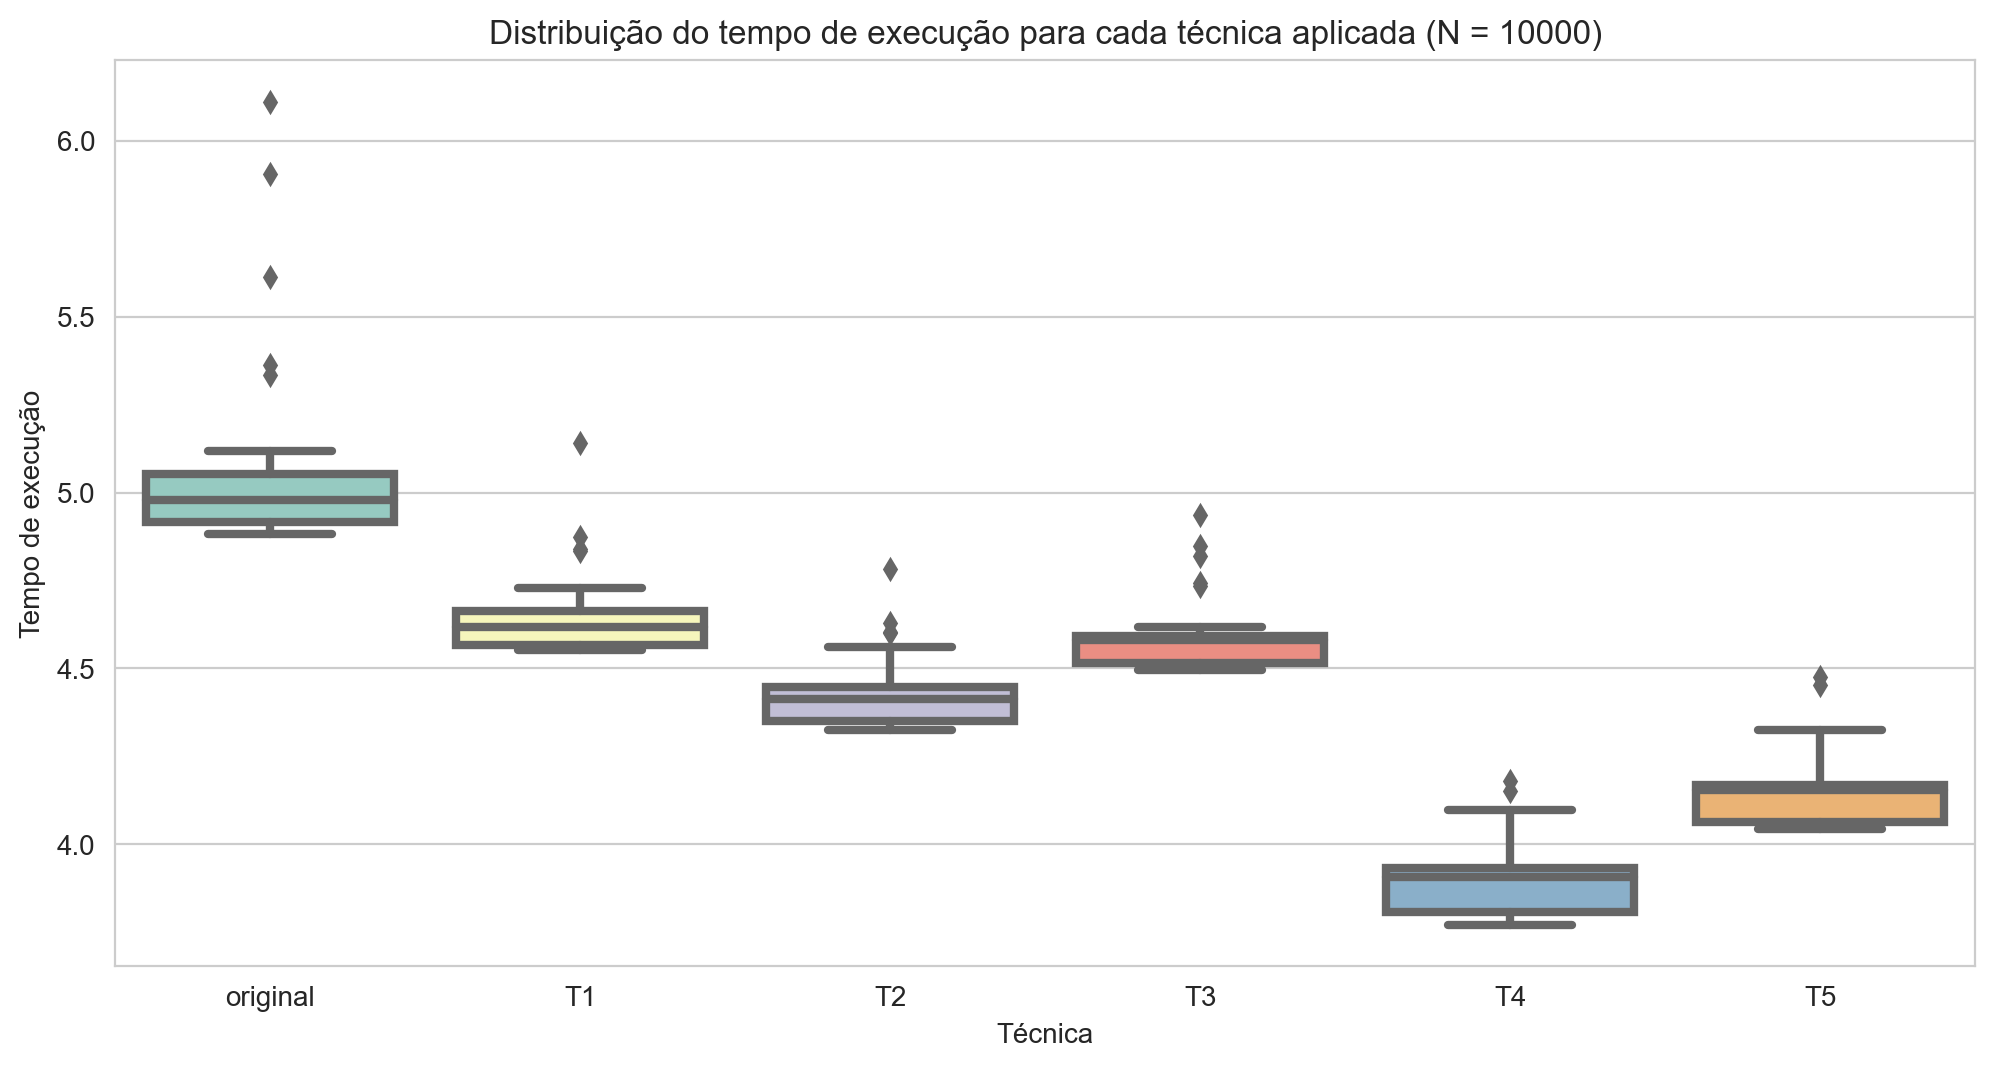

In [54]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize =(12, 6),dpi=200)
sns.set_style("whitegrid")
sns.boxplot(x="tecnica", y="time", order=['original','T1','T2','T3','T4','T5'],
                data=res_m, linewidth=3, palette = "Set3");
plt.title("Distribuição do tempo de execução para cada técnica aplicada (N = 10000)")
plt.xlabel('Técnica')
plt.ylabel('Tempo de execução')
plt.savefig('size10000.png')
plt.show()

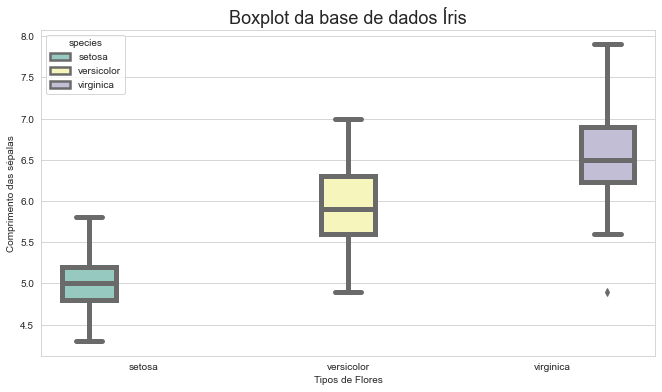

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#carregando a base de dados contida na biblioteca seaborn
base_dados = sns.load_dataset('iris')
# Visualizando a base de dados
base_dados.head(10)
# Use essa flag caso esteja utilizando o jupyter notebook ou o console ipython
%matplotlib inline

# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

sns.set_style("whitegrid")

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
ax = sns.boxplot( x = "species", y ="sepal_length",data = base_dados,
                  hue = "species",linewidth=5, palette = "Set3")

# Adicionando Título ao gráfico
plt.title("Boxplot da base de dados Íris", loc="center", fontsize=18)
plt.xlabel("Tipos de Flores")
plt.ylabel("Comprimento das sépalas")

plt.show()